In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Step1: Data Collection/ Data Extraction

In [2]:
data = pd.read_csv("Admission_Predict.csv")
data.shape

(500, 9)

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# checking any duplicate??

In [8]:
data.duplicated().sum()

0

In [5]:
data.columns.values


array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit'], dtype=object)

In [6]:
data.drop('Serial No.', axis=1, inplace=True)


In [9]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)


In [10]:
data.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Step 2: Data Analysis or Data Exploration¶


In [12]:
data.head(10)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
data.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

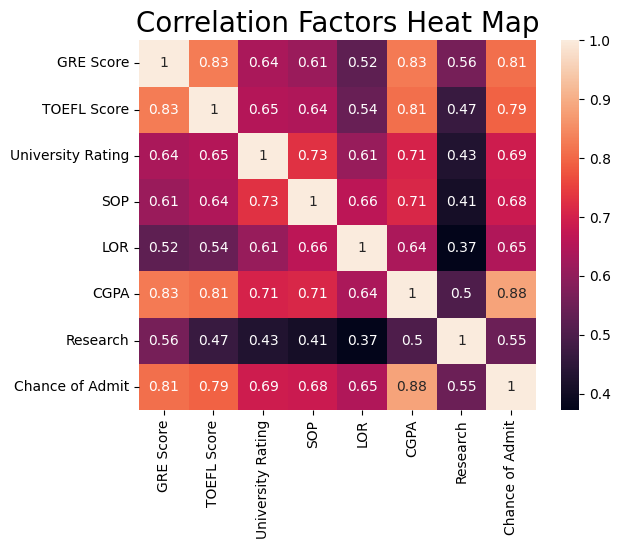

In [15]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

GRE Scores¶
The Graduate Record Examinations (GRE) is a the most popular test for graduate schools' admission, it consists of three sections : 
Analytical Writing, Verbal and Quantitative.

The test's maximum score is 340 and minimum is 260, and according to an official GRE score document, 
the mean test score for all individuals from July 1,2014 to June 30,2017 (almost 1,700,000 test taker) is 306.35 which rounds to 306 with an average standard deviation of 7.19

source: https://www.ets.org/s/gre/pdf/gre_interpreting_scores.pdf

In [16]:
# Isolating GRE Score data
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


C:\Users\asus\AppData\Local\Temp\ipykernel_8900\3724519442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')


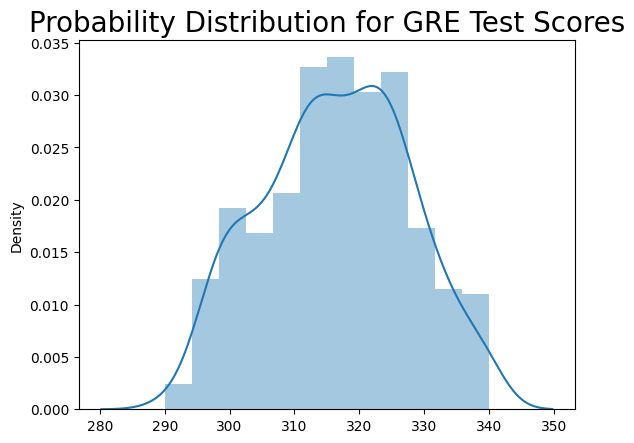

In [17]:
# # Probability Distribution
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')
plt.show()

In [18]:
# Correlation Coeffecients for GRE Score Test
GRE_CORR = pd.DataFrame(data.corr()['GRE Score'])
GRE_CORR.drop('GRE Score', axis=0, inplace=True)
GRE_CORR.rename({'GRE Score': 'GRE Correlation Coeff'}, axis=1, inplace=True)
GRE_CORR

,GRE Correlation Coeff
TOEFL Score,0.827200
University Rating,0.635376
SOP,0.613498
LOR,0.524679
CGPA,0.825878
Research,0.563398
Chance of Admit,0.810351


TOEFL Score
Test of English as a Foreign Language (TOEFL) is a very popular test for English language amongst universities worldwide, it is marked based on three sections: Reading, Listening, Speaking, and Writing, each one of them is out of 30, yielding a maximum score of 120 and a minimum of 0.

ETS (the institute that offers the test) recorded a mean score of 82.6 with a standard deviation of 19.5 (https://www.ets.org/s/toefl/pdf/94227_unlweb.pdf).

Although this is the mean for a wide range of students from all around the world that took the test for different purposes, as students applying for an engineering graduate degree might have a higher average than high school students

In [19]:
# Isolating and describing TOEFL Score
TOEFL = pd.DataFrame(data['TOEFL Score'], columns=['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,500.000000
mean,107.192000
std,6.081868
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


C:\Users\asus\AppData\Local\Temp\ipykernel_8900\4119129779.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='20')


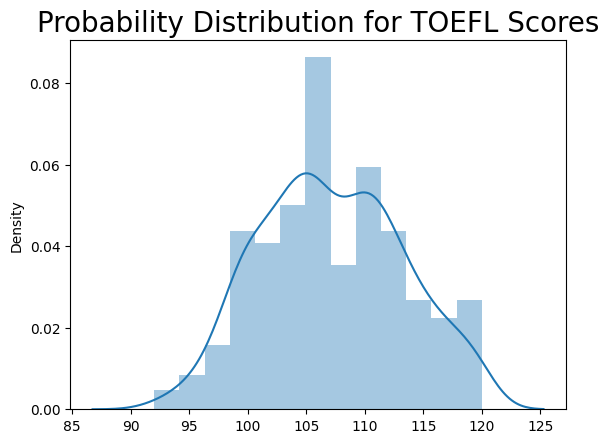

In [20]:
# Probability distribution for TOEFL Scores
sns.distplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='20')
plt.show()

CGPA

Cumulative Grade Points Average (CGPA) is a measure of a student's marks thus his performance in his undergraduate degree.

In [21]:
# Isolating and describing the CGPA
CGPA = pd.DataFrame(data['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000


C:\Users\asus\AppData\Local\Temp\ipykernel_8900\2706099085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='20')


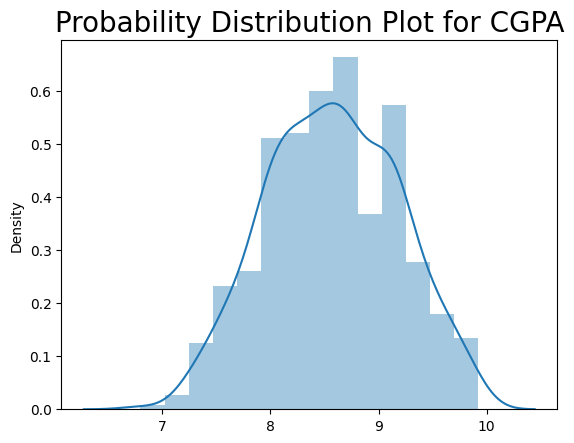

In [22]:
sns.distplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='20')
plt.show()

Research

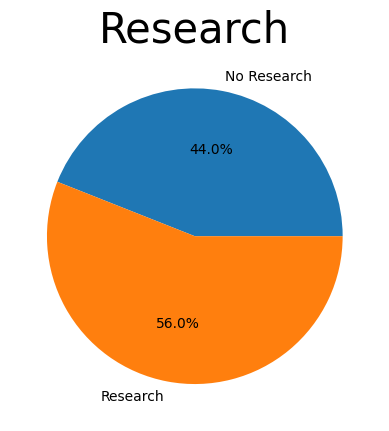

In [23]:
RES_Count = data.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

University Rating

The rating of the university the student completed his undergraduate degree from.

In [24]:
# Isolating and describing 
University_Rating = data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,34
2,126
3,162
4,105
5,73


How good the university is a value between 1 and 5 in integer increment , and since it has positive correlation factors with other variables it's clear that 5 is the highest rating and 1 is the lowest.

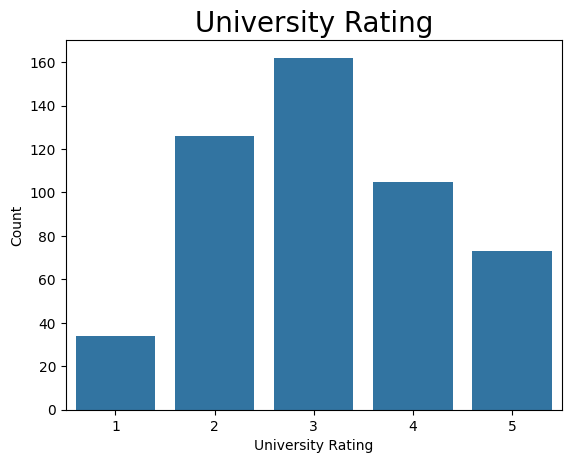

In [26]:
# Barplot for the distribution of the University Rating
sns.barplot(x = University_Rating.index, y = University_Rating['Count']).set_title('University Rating', size='20')
plt.show()

SOP

Statement of Purpose (SOP) is a letter written by the student himself to state his purpose and motivation for completing a graduate degree in addition to his goals while and after he completes his study. Many universities find this letter significant because it better describe the student from a personal perspective.

In [27]:
#Isolating and describing
SOP = pd.DataFrame(data.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Count'}, axis=1, inplace=True)
SOP

,Count
SOP,
1.0,6
1.5,25
2.0,43
2.5,64
3.0,80
3.5,88
4.0,89
4.5,63
5.0,42


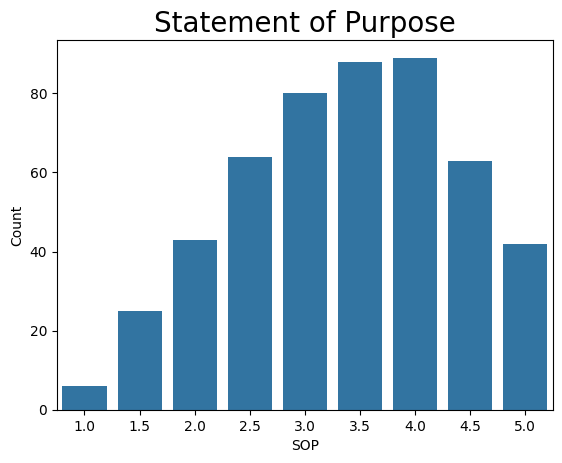

In [29]:
# Barplot for SOP 
sns.barplot(x = SOP.index, y = SOP['Count']).set_title('Statement of Purpose', size='20')
plt.show()

LOR

Letter of Recommendation (LOR) is a letter written by a person that knows the student and recommends that the university accept his admission, this person can be a professor in his undergraduate degree or a professional whom the student have worked with.

In [30]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
LOR

,Count
LOR,
1.0,1
1.5,11
2.0,46
2.5,50
3.0,99
3.5,86
4.0,94
4.5,63
5.0,50


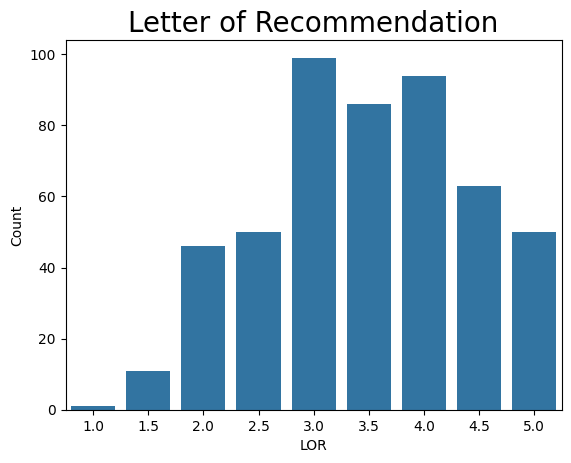

In [31]:
# Barplot for SOP 
sns.barplot(x = LOR.index, y = LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

Are students in this sample too good?

First looking at the students LOR, SOP and University Ratings, most students score (4-5) on the scales, not many scored (1-2.5).

Nonetheless, comparing means for their GRE and TOEFL scores, which are of a universal criteria, they clearly perform better than the average student as the ETS states.

To conclude, it seems only wise to consider the sample to be somehow above average

Chance of Admission

Let's first take a review on the chances of admission.

C:\Users\asus\AppData\Local\Temp\ipykernel_8900\2278635879.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')


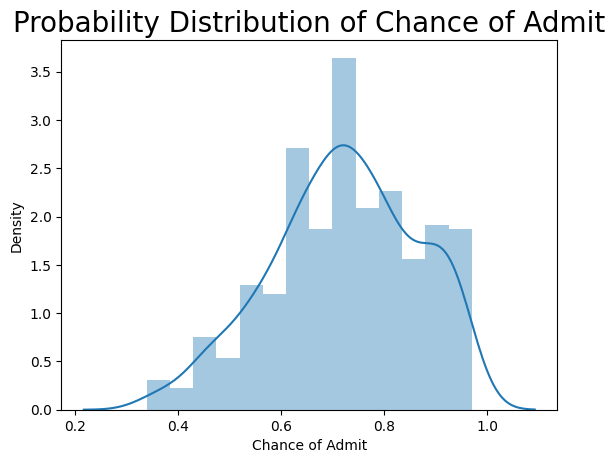

In [32]:
data['Chance of Admit']
sns.distplot(data['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')
plt.show()

In [33]:
data.describe()['Chance of Admit']

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

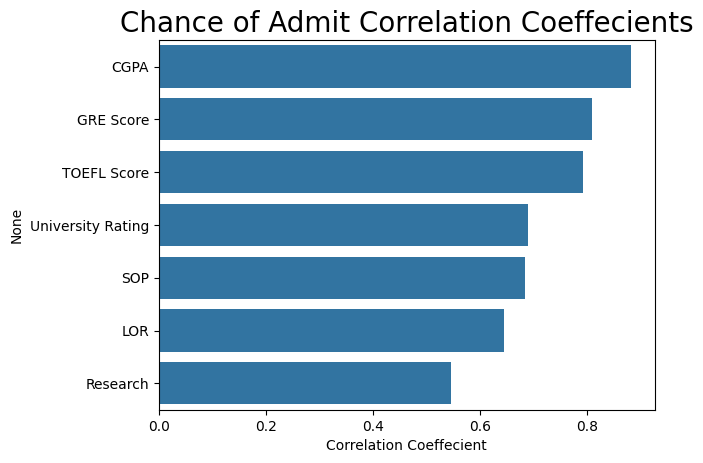

In [34]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

# It is evident that the most contribution factors to the chance of admission are CGPA, GRE Score and TOEFL Score



In [35]:
COA_corr


,Correlation Coeffecient
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871


# Train data

In [36]:
X = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,-0.573563,-0.525364,3,2.0,3.5,-0.341671,0
438,0.135415,0.462163,1,2.5,3.5,-0.060310,1
475,-1.459786,-1.019128,3,3.5,2.5,-1.152650,0
58,-1.459786,-1.348304,1,3.0,2.0,-2.940115,1
380,0.489904,-0.525364,3,3.5,4.0,0.436208,1
...,...,...,...,...,...,...,...
255,-0.839430,0.462163,4,4.0,4.5,-0.341671,0
72,0.401282,0.626751,5,5.0,5.0,1.445794,1
396,0.755771,-0.031601,3,3.0,3.5,0.883074,1
235,0.844393,0.626751,5,4.5,4.0,1.081681,1


In [41]:
X_train.shape

(400, 7)

# Scaling data

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear')) # This is a regression type project so activation function must be "Linear"

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='mean_squared_error',optimizer="Adam",metrics=['accuracy'])


In [48]:
history= model.fit(X_train_scaled,y_train,epochs =20,validation_split=0.2)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 0.4008 - val_accuracy: 0.0000e+00 - val_loss: 0.3215
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.2595 - val_accuracy: 0.0000e+00 - val_loss: 0.2060
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.1654 - val_accuracy: 0.0000e+00 - val_loss: 0.1130
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0928 - val_accuracy: 0.0000e+00 - val_loss: 0.0498
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0361 - val_accuracy: 0.0000e+00 - val_loss: 0.0197
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0150 - val_accuracy: 0.0000e+00 - val_loss: 0.0136
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0118 - val_accuracy: 0.0000e+00 - val_loss: 0.0145
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy

In [49]:
y_pred=model.predict(X_test_scaled)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6063275587010397

In [51]:
y_pred

array([[0.58841825],
       [0.6326692 ],
       [1.085837  ],
       [0.6402719 ],
       [0.822636  ],
       [0.5531398 ],
       [0.6533699 ],
       [0.66767985],
       [0.73831064],
       [0.5979365 ],
       [0.6367964 ],
       [0.5642327 ],
       [0.80948615],
       [0.81098205],
       [0.70862633],
       [0.93702114],
       [0.62479997],
       [0.7988089 ],
       [0.91489315],
       [0.6114828 ],
       [0.5134919 ],
       [0.7909452 ],
       [0.8414315 ],
       [0.74829173],
       [0.8418687 ],
       [0.49625215],
       [0.9749054 ],
       [0.6295666 ],
       [0.85909957],
       [0.62330425],
       [0.6064246 ],
       [0.7717038 ],
       [0.5350544 ],
       [0.9408338 ],
       [0.38599348],
       [0.7596154 ],
       [0.65978456],
       [0.55471545],
       [0.6254461 ],
       [0.9128998 ],
       [0.4757291 ],
       [0.6148423 ],
       [0.8697484 ],
       [1.0481343 ],
       [0.72188675],
       [0.4297984 ],
       [0.6725751 ],
       [0.650

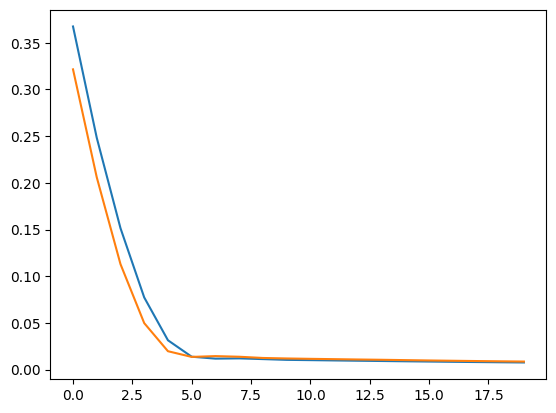

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

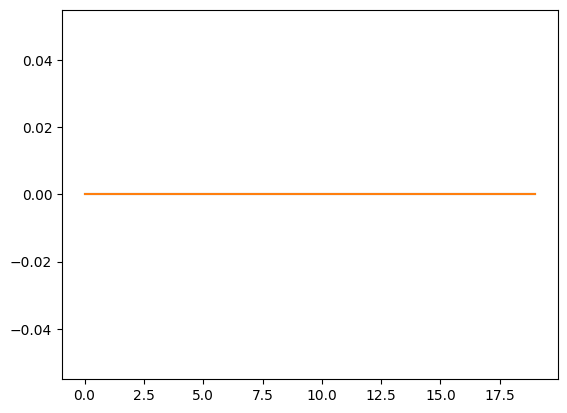

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])